<a href="https://colab.research.google.com/github/mid998/machinelearning/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3 - Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [3]:
# YOUR CODE HERE
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Load other modules
import matplotlib.pyplot as plt  #Graphics
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
#To show graphs within the notebook
%matplotlib inline 

from sklearn.model_selection import train_test_split
import pandas as pd

#df = pd.read_csv('mnist_dataset.csv')


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/assignment03/mnist_dataset.csv')

In [6]:
print(df.shape)
# Split dataset into features and target
y = df['label']
X = df.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size=10000)
#train, test = train_test_split(df, test_size=10000)
print(X_train.shape,y_train.shape)
print(y.unique())

sum_img_rows = df.sum(axis=1)

# uncomment the line below to print result
print(sum_img_rows)

(70000, 786)
(60000, 785) (60000,)
[2 5 8 0 4 6 7 1 9 3]
0         30172
1         18700
2         34916
3         37332
4         20496
          ...  
69995     81653
69996     88827
69997     92479
69998    104046
69999     88278
Length: 70000, dtype: int64


__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [7]:
# YOUR CODE HERE
#np.random.seed(0)
X_train.head()

,Unnamed: 0,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
42274,42274,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9027,9027,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47519,47519,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8500,8500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24668,24668,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train.describe()

,Unnamed: 0,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,34991.641400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.195767,0.096017,0.039100,0.016933,0.015117,0.0020,0.0,0.0,0.0,0.0
std,20218.043987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.953481,4.165560,2.571753,1.602474,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,17487.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,34969.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,52506.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,69999.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


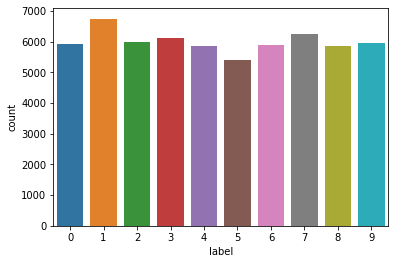

In [9]:
y_train.value_counts().sort_index()
sns.countplot(y_train)

In [10]:
model = RandomForestClassifier(verbose=2,n_jobs=1,max_depth=2, random_state=0 )


In [11]:
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.4s finished


RandomForestClassifier(max_depth=2, n_jobs=1, random_state=0, verbose=2)

In [12]:
y_pred = model.predict(X_test)
# You can think of this as the percent of predictions that were correct.
model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.6371

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


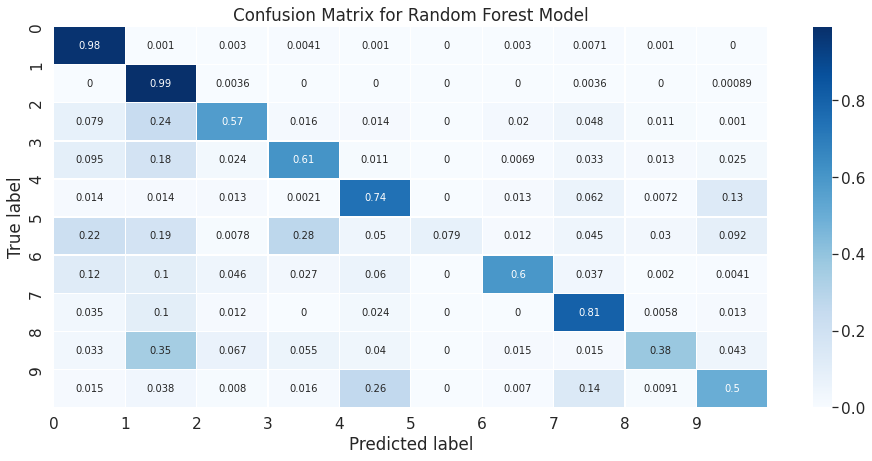

In [13]:
labels = df['label'].unique()
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test,model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

plt.xticks(sorted(labels))
plt.yticks(sorted(labels))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


In [14]:
pred=model.predict(X_test)
print ("Classification Report")
print(classification_report(y_test, pred))


Classification Report
              precision    recall  f1-score   support

           0       0.62      0.98      0.76       986
           1       0.48      0.99      0.65      1125
           2       0.76      0.57      0.65       999
           3       0.63      0.61      0.62      1020
           4       0.62      0.74      0.67       975
           5       1.00      0.08      0.15       902
           6       0.89      0.60      0.71       982
           7       0.68      0.81      0.74      1042
           8       0.83      0.38      0.52       975
           9       0.63      0.50      0.56       994

    accuracy                           0.64     10000
   macro avg       0.71      0.63      0.60     10000
weighted avg       0.71      0.64      0.61     10000



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [15]:
y_train_5  = (y_train == 5)
y_test_5 = (y_train == 5)

In [16]:
from sklearn.model_selection import cross_val_predict
forest_clf = RandomForestClassifier(verbose=2,n_jobs=1,max_depth=2, random_state=0)
forest_clf.fit(X_train, y_train_5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.1s finished


RandomForestClassifier(max_depth=2, n_jobs=1, random_state=0, verbose=2)

In [17]:
y_pred_test_5 = forest_clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [18]:
# Data is balanced so we can use accuracy score
print('accuracy for 5', accuracy_score(y_test, y_pred_test_5))
print('accuracy for all', accuracy_score(y_test,y_pred))

accuracy for 5 0.0986
accuracy for all 0.6371


I've used accuracy, confusion matrix and details in the classification report to assess the Random Forest Classifier on MNIST data. 

Accuracy is ~0.64 which is not ideal (>.70). The confusion matrix heatmap shows many incorrect predictions (off diagonal numbers). Also, the F1 scores are not very good - high of .76 and low of .15. 

Not a great model so far. 

__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [19]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
y = df['label']

standardized_data = scaler.fit_transform(df.drop('label', axis=1))
print(standardized_data.shape)
X = standardized_data

#y = standardized_data['label']
#X = standardized_data.drop('label', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, test_size=10000)


(70000, 785)


In [20]:
# PCA for dimensionality redcution (non-visualization)
pca = PCA()

pca.n_components = 0.95 #784
pca_data_X_train = pca.fit_transform(X_train)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

print('The number of dimensions required to preserve 95% of Digit mnist data set variance is {}. From 785'.format(pca_data_X_train.shape))

The number of dimensions required to preserve 95% of Digit mnist data set variance is (60000, 328). From 785


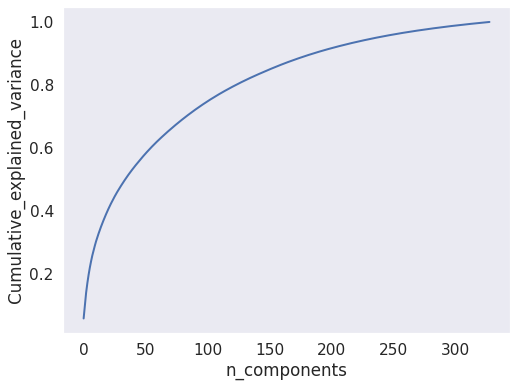

In [21]:
# Plot the PCA spectrum
plt.figure(1, figsize=(8, 6))

plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()
# Grid not showing! Note sure why.

In [22]:
# transform the X test set
pca_data_X_test = pca.transform(X_test)

# retrain rfc on pcs reduced training set
rfc = RandomForestClassifier(verbose=2,n_jobs=1,max_depth=2, random_state=0 )
rfc.fit(pca_data_X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.4s finished


RandomForestClassifier(max_depth=2, n_jobs=1, random_state=0, verbose=2)

In [23]:
pca_data_y_pred = rfc.predict(pca_data_X_test)
rfc.score(pca_data_X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


0.671

Slightly better with after PCA reduction! The Random Forest Classifier went from 0.63 to 0.67 score. 

The time for fit did not seem to be much faster but I did reduce a lot of parameters for colab. 

__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 54.51481509208679 seconds


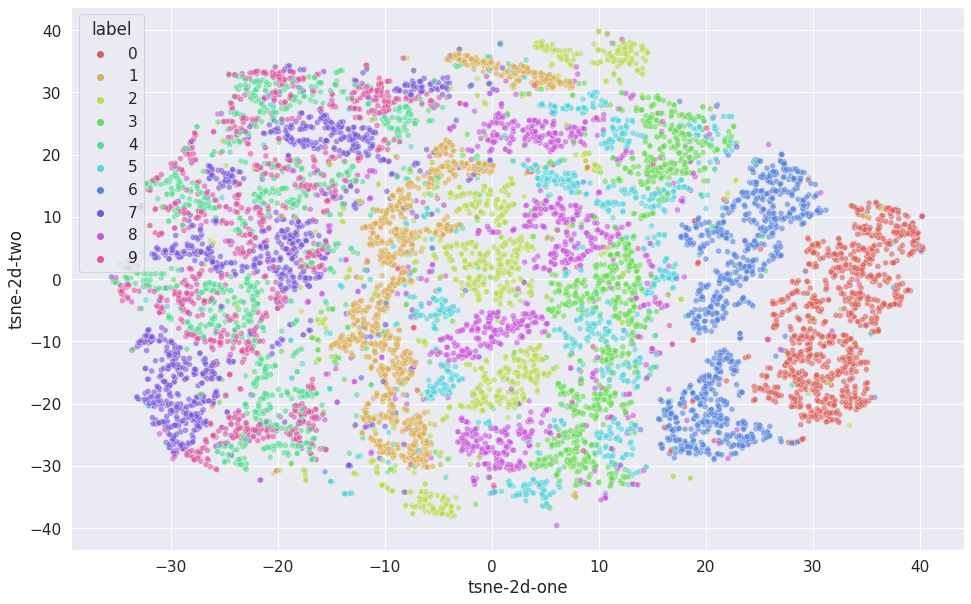

In [24]:
# YOUR CODE 
import time
mnist = df.copy()
N=10000
mnist_df_subset = mnist.loc[:N, :].copy()
time_start = time.time()

# import TSNE from sklearn
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=500)

tsne_result = tsne.fit_transform(mnist_df_subset.values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
mnist_df_subset['tsne-2d-one'] = tsne_result[:, 0]
mnist_df_subset['tsne-2d-two'] = tsne_result[:, 1]
plt.figure(figsize=(16,10))
sns.scatterplot(hue='label', x='tsne-2d-one', y='tsne-2d-two',
               palette=sns.color_palette('hls', 10),
               data=mnist_df_subset,
               alpha=0.6)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 48.725645303726196 seconds


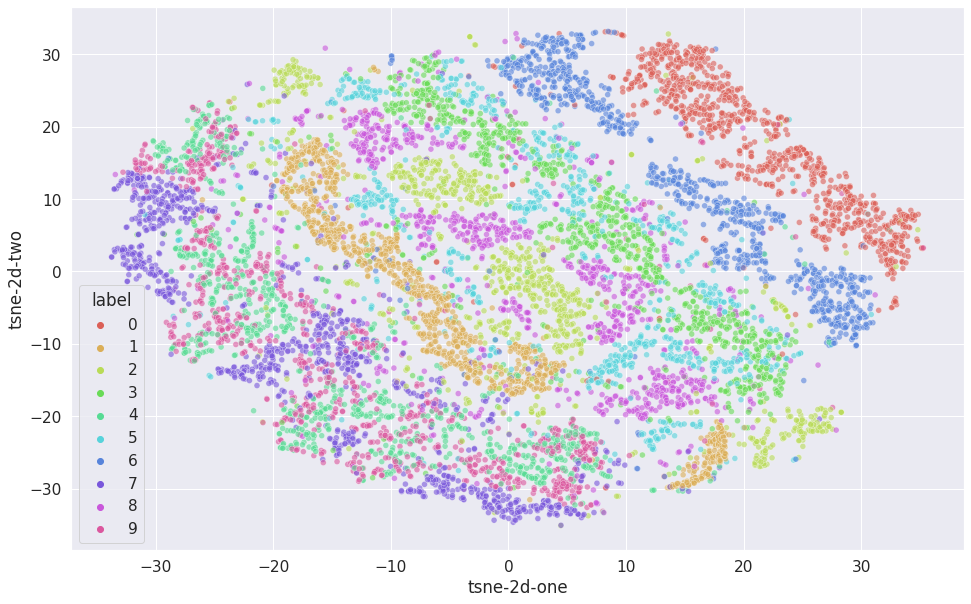

In [25]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=500)

tsne_result = tsne.fit_transform(mnist_df_subset.values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
mnist_df_subset['tsne-2d-one'] = tsne_result[:, 0]
mnist_df_subset['tsne-2d-two'] = tsne_result[:, 1]
plt.figure(figsize=(16,10))
sns.scatterplot(hue='label', x='tsne-2d-one', y='tsne-2d-two',
               palette=sns.color_palette('hls', 10),
               data=mnist_df_subset,
               alpha=0.6)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE done! Time elapsed: 151.5647690296173 seconds


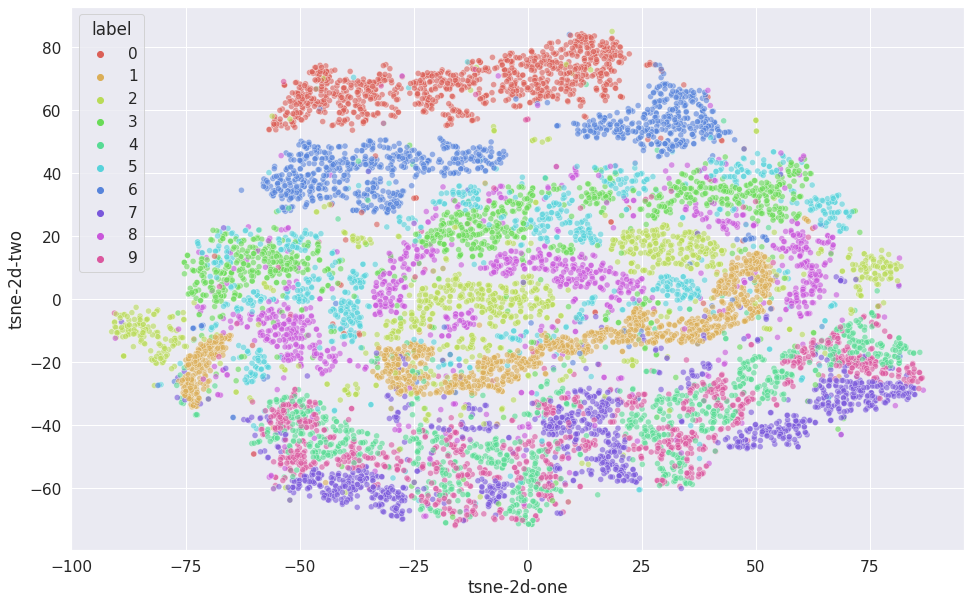

In [26]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1500)

tsne_result = tsne.fit_transform(mnist_df_subset.values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
mnist_df_subset['tsne-2d-one'] = tsne_result[:, 0]
mnist_df_subset['tsne-2d-two'] = tsne_result[:, 1]
plt.figure(figsize=(16,10))
sns.scatterplot(hue='label', x='tsne-2d-one', y='tsne-2d-two',
               palette=sns.color_palette('hls', 10),
               data=mnist_df_subset,
               alpha=0.6)

I am not entirely sure which one of these is clearly the "best" but you can easily see clustering. Also you can see numbers like "7" clustered near "4" and so on. 

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

lle done! Time elapsed: 35.389209508895874 seconds


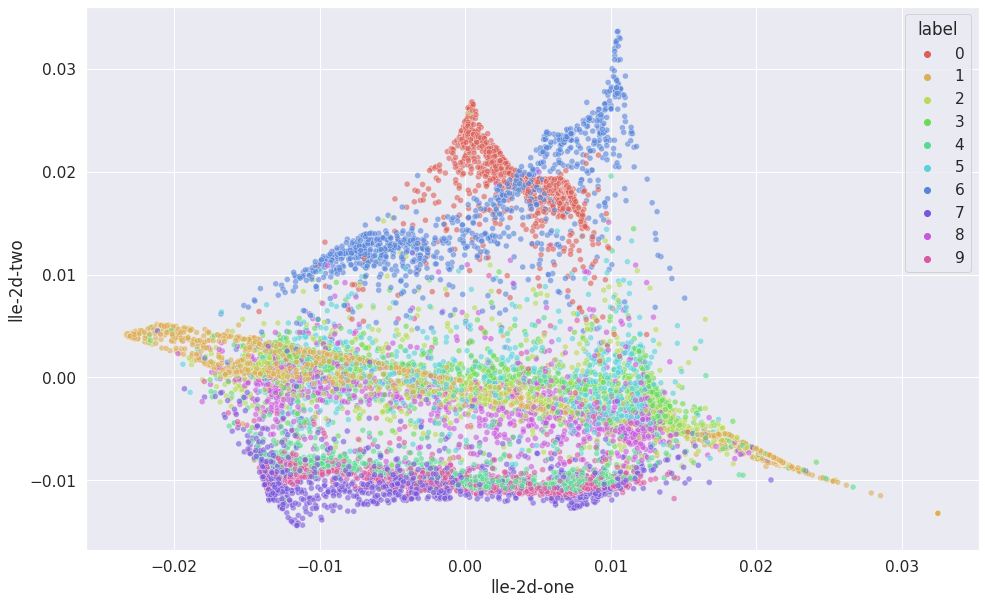

In [29]:
# YOR CODE HERE
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2) #result has 2 dimensions

time_start = time.time()

lle_result = embedding.fit_transform(mnist_df_subset.values)
print('lle done! Time elapsed: {} seconds'.format(time.time()-time_start))
mnist_df_subset['lle-2d-one'] = lle_result[:, 0]
mnist_df_subset['lle-2d-two'] = lle_result[:, 1]


plt.figure(figsize=(16,10))
sns.scatterplot(hue='label', x='lle-2d-one', y='lle-2d-two',
               palette=sns.color_palette('hls', 10),
               data=mnist_df_subset,
               alpha=0.6)

The LLE scatterplot has the extending rays and center clustering typical of LLE but the plot above doesn't reveal as much about the data as T-sne.  